In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv('Final_LUSC_data.csv')

In [4]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Type'])

In [5]:
data

,Type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,U6,U7,U8,VAMP7,Vault,WASH6P,WASIR1,Y_RNA,ZBED1,ZNF883
0,Cancer,1193.0,1.0,950.0,637.0,423.0,1647.0,2956.0,1845.0,5905.0,...,1193.0,1647.0,1193.0,950.0,1193.0,1193.0,1.0,1.0,1.0,1.0
1,Cancer,1107.0,1.0,1046.0,1400.0,1450.0,501.0,566.0,1133.0,1388.0,...,1107.0,501.0,1107.0,1046.0,1107.0,1107.0,1.0,0.0,1.0,1.0
2,Cancer,1047.0,0.0,2706.0,206.0,276.0,164.0,1637.0,2318.0,1614.0,...,1047.0,164.0,1047.0,2706.0,1047.0,1047.0,0.0,12.0,0.0,0.0
3,Cancer,2094.0,0.0,861.0,1253.0,1089.0,974.0,1532.0,3774.0,4877.0,...,2094.0,974.0,2094.0,861.0,2094.0,2094.0,0.0,1.0,0.0,0.0
4,Normal,1017.0,1.0,767.0,596.0,289.0,3405.0,2068.0,2147.0,725.0,...,1017.0,3405.0,1017.0,767.0,1017.0,1017.0,1.0,3168.0,1.0,1.0
5,Normal,485.0,0.0,493.0,296.0,162.0,2258.0,5015.0,2048.0,611.0,...,485.0,2258.0,485.0,493.0,485.0,485.0,0.0,2466.0,0.0,0.0
6,Normal,790.0,2.0,590.0,396.0,215.0,2422.0,2750.0,1465.0,554.0,...,790.0,2422.0,790.0,590.0,790.0,790.0,2.0,2277.0,2.0,2.0
7,Normal,1728.0,8.0,1385.0,1018.0,495.0,3530.0,11958.0,2278.0,852.0,...,1728.0,3530.0,1728.0,1385.0,1728.0,1728.0,8.0,4270.0,8.0,8.0


In [8]:
one_hot_encoded_data.drop('Type_Normal', axis=1, inplace=True)

In [9]:
one_hot_encoded_data

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,U7,U8,VAMP7,Vault,WASH6P,WASIR1,Y_RNA,ZBED1,ZNF883,Type_Cancer
0,1193.0,1.0,950.0,637.0,423.0,1647.0,2956.0,1845.0,5905.0,1344.0,...,1647.0,1193.0,950.0,1193.0,1193.0,1.0,1.0,1.0,1.0,True
1,1107.0,1.0,1046.0,1400.0,1450.0,501.0,566.0,1133.0,1388.0,1814.0,...,501.0,1107.0,1046.0,1107.0,1107.0,1.0,0.0,1.0,1.0,True
2,1047.0,0.0,2706.0,206.0,276.0,164.0,1637.0,2318.0,1614.0,293.0,...,164.0,1047.0,2706.0,1047.0,1047.0,0.0,12.0,0.0,0.0,True
3,2094.0,0.0,861.0,1253.0,1089.0,974.0,1532.0,3774.0,4877.0,1015.0,...,974.0,2094.0,861.0,2094.0,2094.0,0.0,1.0,0.0,0.0,True
4,1017.0,1.0,767.0,596.0,289.0,3405.0,2068.0,2147.0,725.0,881.0,...,3405.0,1017.0,767.0,1017.0,1017.0,1.0,3168.0,1.0,1.0,False
5,485.0,0.0,493.0,296.0,162.0,2258.0,5015.0,2048.0,611.0,768.0,...,2258.0,485.0,493.0,485.0,485.0,0.0,2466.0,0.0,0.0,False
6,790.0,2.0,590.0,396.0,215.0,2422.0,2750.0,1465.0,554.0,657.0,...,2422.0,790.0,590.0,790.0,790.0,2.0,2277.0,2.0,2.0,False
7,1728.0,8.0,1385.0,1018.0,495.0,3530.0,11958.0,2278.0,852.0,1981.0,...,3530.0,1728.0,1385.0,1728.0,1728.0,8.0,4270.0,8.0,8.0,False


In [10]:
X = data.drop('Type', axis=1)
y = one_hot_encoded_data['Type_Cancer']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
sel_ = SelectFromModel(Lasso(alpha=0.001))
sel_.fit(scaler.transform(X_train), y_train)
sel_.get_support()

c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.749e-04, tolerance: 1.500e-04
  model = cd_fast.enet_coordinate_descent(


array([False, False, False, ..., False, False, False])

In [21]:
selected_features = data.drop('Type', axis=1).columns[sel_.get_support()]

In [22]:
selected_features

Index(['FGR', 'GCLC', 'ENPP4', 'MAD1L1', 'M6PR', 'CFLAR', 'AK2', 'KDM1A',
       'SLC22A16', 'SKAP2', 'PON1', 'TFAP2B', 'IYD', 'STARD3NL', 'NR1H4',
       'MDH1', 'ATP2C1', 'CD44', 'B4GALT7', 'SLC39A9', 'TLL1', 'MSMO1',
       'SP100', 'DNAJA2', 'EIF2B3', 'ACTB', 'PSEN1', 'IMPG2', 'NSFL1C', 'PES1',
       'SNU13', 'HM13', 'DNAJA3', 'TRIP4', 'HOXA13', 'OCIAD1', 'DSE', 'RPS15',
       'SRSF7', 'EEF2KMT', 'SCPEP1', 'RPAP2', 'NDUFB4P12', 'IRF1', 'UQCR11',
       'UBQLN1', 'CNEP1R1P1', 'SKA2', 'SLC52A2', 'OR9Q1', 'PRG2', 'IFNA2',
       'YRDC'],
      dtype='object')

In [23]:
sel_.fit(scaler.transform(X_test), y_test)
data.drop('Type', axis=1).columns[sel_.get_support()]

c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.728e-04, tolerance: 5.000e-05
  model = cd_fast.enet_coordinate_descent(


Index(['C1orf112', 'KRT33A', 'TRAPPC6A', 'CRAMP1', 'STMN4'], dtype='object')

In [24]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [30]:
mod_df = data.set_index('Type')
metadata = pd.DataFrame(zip(mod_df.index, np.repeat(['Cancer', 'Normal'], [4, 4])), columns=['Sample', 'Type'])
metadata.set_index('Sample', inplace=True)
diff_data = mod_df
diff_data = diff_data.astype('int64')
dds = DeseqDataSet(counts=diff_data, metadata=metadata, design_factors='Type')
dds.obs_names_make_unique
dds.deseq2()
stat_res = DeseqStats(dds, contrast=('Type', 'Cancer', 'Normal'))
stat_res.summary()
res = stat_res.results_df
res

C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Fitting size factors...
... done in 0.10 seconds.

Fitting dispersions...
... done in 25.23 seconds.

Fitting dispersion trend curve...
C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\pydeseq2\dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 2.23 seconds.

Fitting MAP dispersions...


In [26]:
res['symbol'] = res.index

In [27]:
from sanbomics.plots import volcano

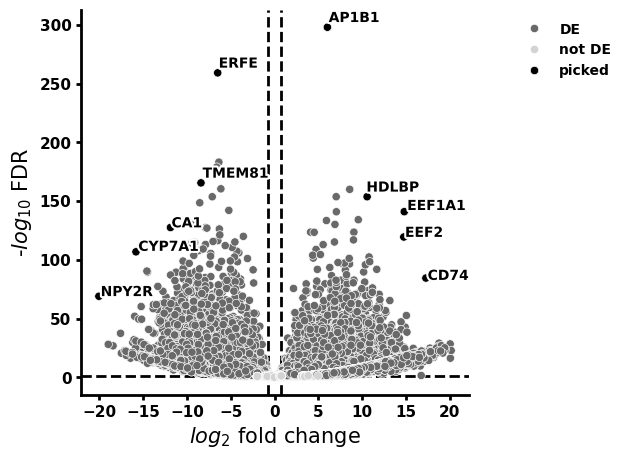

In [28]:
volcano(res, symbol='symbol')

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
sel_ = SelectFromModel(Lasso(alpha=0.000005, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=Lasso(alpha=5e-06, random_state=10))

In [16]:
sel_.get_support()

array([ True,  True,  True, ..., False, False, False])

In [17]:
data.drop('Type', axis=1).columns[sel_.get_support()]

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'RWDD2A', 'SLC30A9', 'MTMR11', 'YAF2', 'ZMYND11', 'DPEP1', 'ATP1A2',
       'CPS1', 'C8B', 'ERCC8'],
      dtype='object', length=277)

In [18]:
new_data = data[data.drop('Type', axis=1).columns[sel_.get_support()]]

In [19]:
new_data

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,RWDD2A,SLC30A9,MTMR11,YAF2,ZMYND11,DPEP1,ATP1A2,CPS1,C8B,ERCC8
0,1193.0,1.0,950.0,637.0,423.0,1647.0,2956.0,1845.0,5905.0,1344.0,...,241.0,1845.0,723.0,491.0,2766.0,83.0,184.0,229.0,151.0,302.0
1,1107.0,1.0,1046.0,1400.0,1450.0,501.0,566.0,1133.0,1388.0,1814.0,...,339.0,3126.0,339.0,848.0,1867.0,13.0,29.0,839.0,3.0,290.0
2,1047.0,0.0,2706.0,206.0,276.0,164.0,1637.0,2318.0,1614.0,293.0,...,141.0,1289.0,97.0,577.0,667.0,6.0,0.0,134.0,56.0,249.0
3,2094.0,0.0,861.0,1253.0,1089.0,974.0,1532.0,3774.0,4877.0,1015.0,...,190.0,1323.0,789.0,424.0,1915.0,44.0,13.0,80.0,114.0,271.0
4,1017.0,1.0,767.0,596.0,289.0,3405.0,2068.0,2147.0,725.0,881.0,...,477.0,1028.0,1824.0,1168.0,31.0,42.0,19952.0,993.0,1386.0,269.0
5,485.0,0.0,493.0,296.0,162.0,2258.0,5015.0,2048.0,611.0,768.0,...,294.0,605.0,1478.0,1239.0,481.0,24.0,11433.0,146.0,841.0,72.0
6,790.0,2.0,590.0,396.0,215.0,2422.0,2750.0,1465.0,554.0,657.0,...,244.0,519.0,1849.0,875.0,49.0,56.0,10476.0,72.0,812.0,194.0
7,1728.0,8.0,1385.0,1018.0,495.0,3530.0,11958.0,2278.0,852.0,1981.0,...,821.0,1635.0,4338.0,941.0,179.0,119.0,12841.0,640.0,2780.0,265.0


In [20]:
some_data = pd.read_table('GSE9750.txt')

In [21]:
some_data

,ID_REF,GSM246087,GSM246088,GSM246089,GSM246090,GSM246119,GSM246120,GSM246121,GSM246122,GSM246123,...,GSM247877,GSM247878,GSM247879,GSM247881,GSM247882,GSM247883,GSM247884,GSM247885,GSM247886,GSM247887
0,1007_s_at,1353.7,1678.6,244.3,1547.2,678.6,610.0,2201.2,1581.6,574.2,...,924.3,798.9,1425.4,1258.6,470.0,1064.3,1085.0,281.8,433.8,599.7
1,1053_at,135.8,207.1,172.7,187.3,321.3,279.5,242.5,352.0,211.8,...,79.3,147.9,150.0,193.9,42.6,125.1,53.3,23.9,13.6,42.2
2,117_at,3.3,4.6,56.6,52.4,23.9,27.9,25.6,47.1,4.6,...,65.9,96.8,77.6,121.9,61.3,112.7,46.6,53.4,42.2,31.5
3,121_at,393.2,1179.3,800.9,431.1,455.8,325.3,463.4,444.3,373.8,...,1455.2,395.4,625.3,418.5,546.9,681.4,226.0,360.4,140.2,354.3
4,1255_g_at,13.6,9.4,43.2,2.1,9.0,1.4,8.6,15.1,11.9,...,32.8,37.6,48.0,15.7,3.6,27.0,18.3,11.0,5.1,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,2.4,5.8,19.1,1.6,2.4,8.1,1.3,3.7,4.9,...,6.2,9.0,5.8,5.0,2.4,4.5,7.6,1.8,1.2,4.8
22279,AFFX-ThrX-M_at,5.6,3.5,16.9,9.1,2.0,3.7,5.8,2.8,6.0,...,5.6,8.3,3.4,11.5,8.7,31.7,2.5,8.4,0.8,2.7
22280,AFFX-TrpnX-3_at,1.0,0.4,3.6,0.7,4.2,0.2,6.2,2.0,2.8,...,5.7,1.3,3.1,1.1,0.4,1.2,5.5,0.4,1.0,0.5
22281,AFFX-TrpnX-5_at,9.2,0.5,8.2,8.9,5.0,5.1,1.3,1.2,10.6,...,12.5,12.7,3.2,2.3,1.9,3.4,2.4,2.1,1.5,6.4


In [22]:
deb = some_data.set_index('ID_REF').T.iloc[21:, :]

In [23]:
deb

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM247164,1679.0,87.6,79.4,814.6,31.3,219.5,126.3,15.8,71.5,55.0,...,10.9,82.7,23441.5,25856.5,33.4,4.8,6.1,2.5,12.2,2.0
GSM247165,1663.6,93.2,54.0,552.3,42.7,225.4,77.8,57.8,43.6,47.0,...,42.6,51.3,15339.3,17759.8,4.1,5.1,3.2,15.2,4.3,2.7
GSM247166,1207.4,127.5,98.2,436.2,48.8,124.0,10.6,80.1,11.4,64.3,...,48.7,139.9,30220.3,33134.5,3.8,13.8,22.9,2.2,6.4,2.1
GSM247168,1302.0,121.2,61.9,630.9,30.9,145.8,54.9,71.6,24.8,46.8,...,71.0,115.5,27484.2,21310.5,5.4,11.8,10.8,2.1,26.0,3.5
GSM247169,845.9,56.6,93.8,844.2,7.8,119.5,66.1,85.2,6.9,67.3,...,12.4,71.9,19862.6,23138.1,4.8,8.4,5.7,2.0,3.2,4.7
GSM247171,1673.1,112.0,91.3,754.7,48.4,205.6,98.5,13.5,157.6,43.8,...,17.4,75.3,27101.7,27227.1,11.9,5.1,7.3,3.1,11.5,5.7
GSM247173,2126.0,123.7,64.3,908.3,48.5,264.5,87.2,16.9,6.6,36.3,...,15.4,13.6,24122.8,26476.8,6.6,7.1,28.2,2.3,5.4,4.8
GSM247174,1549.1,91.3,141.9,711.3,38.5,235.6,56.3,31.7,70.9,59.6,...,10.5,59.6,28322.4,26879.3,6.5,9.4,23.6,13.3,6.8,5.8
GSM247175,1963.7,72.6,108.5,767.6,36.9,179.8,77.5,93.9,94.0,43.5,...,8.6,60.2,18657.3,18368.5,7.3,23.6,5.5,1.9,4.5,5.7
GSM247188,1438.6,16.9,17.5,875.4,22.3,207.1,96.7,19.0,93.1,59.8,...,18.1,152.1,46287.9,46856.5,7.0,10.6,6.6,20.1,7.6,6.8


In [49]:
deb['type'] = np.repeat([0, 1], [12, 33])

In [50]:
deb

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type
GSM247164,1679.0,87.6,79.4,814.6,31.3,219.5,126.3,15.8,71.5,55.0,...,82.7,23441.5,25856.5,33.4,4.8,6.1,2.5,12.2,2.0,0
GSM247165,1663.6,93.2,54.0,552.3,42.7,225.4,77.8,57.8,43.6,47.0,...,51.3,15339.3,17759.8,4.1,5.1,3.2,15.2,4.3,2.7,0
GSM247166,1207.4,127.5,98.2,436.2,48.8,124.0,10.6,80.1,11.4,64.3,...,139.9,30220.3,33134.5,3.8,13.8,22.9,2.2,6.4,2.1,0
GSM247168,1302.0,121.2,61.9,630.9,30.9,145.8,54.9,71.6,24.8,46.8,...,115.5,27484.2,21310.5,5.4,11.8,10.8,2.1,26.0,3.5,0
GSM247169,845.9,56.6,93.8,844.2,7.8,119.5,66.1,85.2,6.9,67.3,...,71.9,19862.6,23138.1,4.8,8.4,5.7,2.0,3.2,4.7,0
GSM247171,1673.1,112.0,91.3,754.7,48.4,205.6,98.5,13.5,157.6,43.8,...,75.3,27101.7,27227.1,11.9,5.1,7.3,3.1,11.5,5.7,0
GSM247173,2126.0,123.7,64.3,908.3,48.5,264.5,87.2,16.9,6.6,36.3,...,13.6,24122.8,26476.8,6.6,7.1,28.2,2.3,5.4,4.8,0
GSM247174,1549.1,91.3,141.9,711.3,38.5,235.6,56.3,31.7,70.9,59.6,...,59.6,28322.4,26879.3,6.5,9.4,23.6,13.3,6.8,5.8,0
GSM247175,1963.7,72.6,108.5,767.6,36.9,179.8,77.5,93.9,94.0,43.5,...,60.2,18657.3,18368.5,7.3,23.6,5.5,1.9,4.5,5.7,0
GSM247188,1438.6,16.9,17.5,875.4,22.3,207.1,96.7,19.0,93.1,59.8,...,152.1,46287.9,46856.5,7.0,10.6,6.6,20.1,7.6,6.8,0


In [25]:
metadata = pd.DataFrame(zip(deb.index, np.repeat(['N', 'C'], [12, 33])), columns = ['Sample', 'Type'])

In [26]:
deb.drop('type', axis=1, inplace=True)

In [27]:
metadata

,Sample,Type
0,GSM247164,N
1,GSM247165,N
2,GSM247166,N
3,GSM247168,N
4,GSM247169,N
5,GSM247171,N
6,GSM247173,N
7,GSM247174,N
8,GSM247175,N
9,GSM247188,N


In [28]:
metadata = metadata.set_index('Sample')


In [29]:
metadata

,Type
Sample,
GSM247164,N
GSM247165,N
GSM247166,N
GSM247168,N
GSM247169,N
GSM247171,N
GSM247173,N
GSM247174,N
GSM247175,N


In [30]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [31]:
diff_data = deb

In [32]:
diff_data = diff_data.astype('int64')

In [33]:
dds = DeseqDataSet(counts=diff_data, metadata=metadata, design_factors='Type')

In [34]:
dds

AnnData object with n_obs × n_vars = 45 × 22283
    obs: 'Type'
    obsm: 'design_matrix'

In [35]:
dds.deseq2()

Fitting size factors...
... done in 0.21 seconds.

Fitting dispersions...
... done in 11.97 seconds.

Fitting dispersion trend curve...
... done in 1.10 seconds.

Fitting MAP dispersions...
... done in 14.60 seconds.

Fitting LFCs...
... done in 6.79 seconds.

Replacing 446 outlier genes.

Fitting dispersions...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 0.37 seconds.

Fitting LFCs...
... done in 0.17 seconds.



In [36]:
stat_res = DeseqStats(dds, contrast=('Type', 'C', 'N'))

In [37]:
stat_res.summary()

Running Wald tests...
... done in 3.91 seconds.



Log2 fold change & Wald test p-value: Type C vs N
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ID_REF                                                                       
1007_s_at        1408.768820        0.086411  0.162321  0.532346  0.594486   
1053_at           117.944604        0.930531  0.244232  3.810026  0.000139   
117_at             83.606321        0.310445  0.247065  1.256532  0.208923   
121_at            564.015906       -0.113875  0.209648 -0.543172  0.587011   
1255_g_at          22.869887       -0.529133  0.267578 -1.977488  0.047986   
...                      ...             ...       ...       ...       ...   
AFFX-ThrX-5_at      6.716267       -0.300550  0.347522 -0.864838  0.387128   
AFFX-ThrX-M_at      7.860391       -0.477326  0.414027 -1.152886  0.248957   
AFFX-TrpnX-3_at     3.623092       -0.781736  0.555666 -1.406845  0.159473   
AFFX-TrpnX-5_at     6.142428       -0.113199  0.412225 -0.274604  0.783620   
AFFX-TrpnX-M_a

In [38]:
res = stat_res.results_df

In [39]:
res['symbols'] = res.index.values

In [40]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbols
ID_REF,,,,,,,
1007_s_at,1408.768820,0.086411,0.162321,0.532346,0.594486,0.707258,1007_s_at
1053_at,117.944604,0.930531,0.244232,3.810026,0.000139,0.000836,1053_at
117_at,83.606321,0.310445,0.247065,1.256532,0.208923,0.330009,117_at
121_at,564.015906,-0.113875,0.209648,-0.543172,0.587011,0.701281,121_at
1255_g_at,22.869887,-0.529133,0.267578,-1.977488,0.047986,0.106322,1255_g_at
...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,6.716267,-0.300550,0.347522,-0.864838,0.387128,0.520664,AFFX-ThrX-5_at
AFFX-ThrX-M_at,7.860391,-0.477326,0.414027,-1.152886,0.248957,0.375771,AFFX-ThrX-M_at
AFFX-TrpnX-3_at,3.623092,-0.781736,0.555666,-1.406845,0.159473,0.269289,AFFX-TrpnX-3_at


In [41]:
res.index.name

'ID_REF'

In [42]:
from sanbomics.plots import volcano

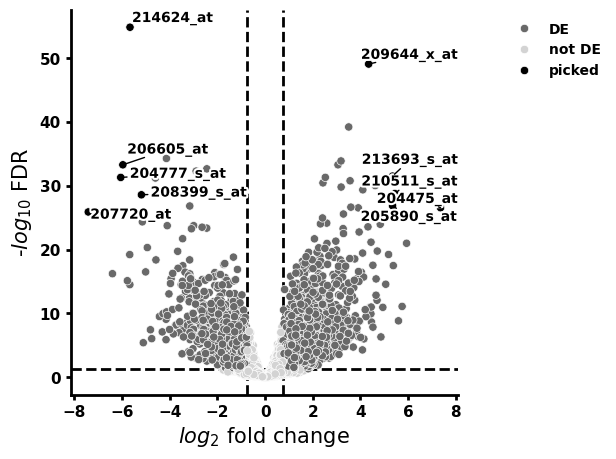

In [43]:
volcano(res, symbol="symbols")

In [45]:
ada = some_data.set_index('ID_REF').T.iloc[21:, :].index.name

In [46]:
ada

In [51]:
X = some_data.set_index('ID_REF').T.iloc[21:, :]
y = deb['type']

In [52]:
X.shape

(45, 22283)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [60]:
sel_ = SelectFromModel(Lasso(alpha=0.00001, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.888e-04, tolerance: 6.061e-04
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=1e-05, random_state=10))

In [61]:
sel_.get_support()

array([ True,  True,  True, ..., False, False, False])

In [62]:
selected = np.array(some_data.set_index('ID_REF').T.iloc[21:, :].columns[sel_.get_support()])

In [63]:
selected

array(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at', '1438_at', '1487_at',
       '1494_f_at', '1598_g_at', '160020_at', '1729_at', '1773_at',
       '177_at', '179_at', '1861_at', '200001_at', '200002_at',
       '200004_at', '200005_at', '200006_at', '200007_at', '200008_s_at',
       '200009_at', '200011_s_at', '200012_x_at', '200013_at',
       '200014_s_at', '200016_x_at', '200017_at', '200018_at',
       '200019_s_at', '200021_at', '200022_at', '200023_s_at',
       '200024_at', '200025_s_at', '200026_at', '200027_at',
       '200028_s_at', '200029_at', '200030_s_at', '200031_s_at',
       '200032_s_at', '200033_at', '200034_s_at', '200035_at',
       '200036_s_at', '200037_s_at', '200041_s_at', '200042_at',
       '200043_at', '200046_at', '200048_s_at', '200051_at',
       '200052_s_at', '200053_at', '200054_at', '200055_at',
       '200056_s_at', '200057_s_at', '200058_s_at', '200060_s_at',
       '2000

In [64]:
fun = np.isin(["214624_at", "206605_at","207720_at","204777_s_at","208399_s_at","209644_x_at","213693_s_at","205890_s_at","204475_at","210511_s_at"], selected)

In [65]:
fun

array([False, False, False, False, False, False, False, False, False,
       False])

In [168]:
selected.(["214624_at", "206605_at",
"207720_at",
"204777_s_at",
"208399_s_at",
"209644_x_at",
"213693_s_at",
"205890_s_at",
"204475_at",
"210511_s_at"])

array([9, 5, 6, 3, 6, 7, 8, 5, 3, 7], dtype=int64)

In [136]:
def differential_analysis(df: pd.DataFrame, normal: int, cancer: int):
    mod_df = df.set_index('ID_ref').T
    metadata = pd.DataFrame(zip(mod_df.index, np.repeat(['Control', 'Cancer'], [normal, cancer])), columns=['Sample', 'Type'])
    metadata.set_index('Sample', inplace=True)
    diff_data = mod_df
    diff_data = diff_data.astype('int64')
    dds = DeseqDataSet(counts=diff_data, metadata=metadata, design_factors='Type')
    dds.deseq2()
    stat_res = DeseqStats(dds, contrast=('Type', 'Control', 'Cancer'))
    stat_res.summary()
    res = stat_res.results_df
    return res

In [137]:
res = differential_analysis(new_gene_data, 14, 17)

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.16 seconds.

Fitting dispersion trend curve...
C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\pydeseq2\dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.02 seconds.

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Fitting MAP dispersions...
... done in 1.05 seconds.

Fitting LFCs...
... done in 0.22 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 0.12 seconds.



Log2 fold change & Wald test p-value: Type Control vs Cancer
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ID_ref                                                                      
hsa-miR-652-3p    28.198090        0.118650  0.097547  1.216340  0.223856   
hsa-miR-181a-5p   28.759848        0.109385  0.096616  1.132164  0.257566   
hsa-miR-221-3p    26.688378        0.099914  0.100285  0.996301  0.319104   
hsa-let-7f-5p     31.581257       -0.065566  0.092598 -0.708073  0.478900   
hsa-miR-27b-3p    28.937159        0.054857  0.096384  0.569146  0.569257   
...                     ...             ...       ...       ...       ...   
hsa-miR-21-5p     26.024781        0.027117  0.101714  0.266605  0.789774   
hsa-miR-30e-3p    34.026622        0.026696  0.088947  0.300130  0.764078   
hsa-miR-543       34.335761        0.000606  0.088563  0.006846  0.994538   
hsa-miR-29b-2-5p  35.180256       -0.009430  0.087556 -0.107703  0.914231   
hsa-miR-495-3p 

In [138]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ID_ref,,,,,,
hsa-miR-652-3p,28.198090,0.118650,0.097547,1.216340,0.223856,0.994538
hsa-miR-181a-5p,28.759848,0.109385,0.096616,1.132164,0.257566,0.994538
hsa-miR-221-3p,26.688378,0.099914,0.100285,0.996301,0.319104,0.994538
hsa-let-7f-5p,31.581257,-0.065566,0.092598,-0.708073,0.478900,0.994538
hsa-miR-27b-3p,28.937159,0.054857,0.096384,0.569146,0.569257,0.994538
...,...,...,...,...,...,...
hsa-miR-21-5p,26.024781,0.027117,0.101714,0.266605,0.789774,0.994538
hsa-miR-30e-3p,34.026622,0.026696,0.088947,0.300130,0.764078,0.994538
hsa-miR-543,34.335761,0.000606,0.088563,0.006846,0.994538,0.994538


In [120]:
new_gene_data = pd.read_table('GSE117063_non-normalized_data.txt')

In [71]:
new_gene_data = new_gene_data.set_index('ID_ref').T

In [81]:
metadata = pd.DataFrame(zip(new_gene_data.index, np.repeat(['Control', 'DLBCL'], [14, 17])), columns = ['Sample', 'Type'])

In [82]:
metadata.set_index('Sample', inplace=True)

In [83]:
metadata

,Type
Sample,
Control 1,Control
Control 2,Control
Control 3,Control
Control 4,Control
Control 5,Control
Control 6,Control
Control 7,Control
Control 8,Control
Control 9,Control


In [77]:
new_gene_data

ID_ref,hsa-miR-652-3p,hsa-miR-181a-5p,hsa-miR-221-3p,hsa-let-7f-5p,hsa-miR-27b-3p,hsa-miR-374b-5p,hsa-miR-93-5p,hsa-miR-200a-3p,hsa-miR-484,hsa-miR-106a-5p,...,hsa-miR-182-5p,hsa-miR-15b-5p,hsa-miR-106b-3p,hsa-miR-29c-3p,hsa-miR-95,hsa-miR-21-5p,hsa-miR-30e-3p,hsa-miR-543,hsa-miR-29b-2-5p,hsa-miR-495-3p
Control 1,31.12,31.44,29.16,31.77,32.04,35.45,28.87,40.18,31.22,29.20,...,40.21,31.84,35.09,32.81,36.70,28.87,34.93,36.12,36.69,35.86
Control 2,33.60,33.56,31.15,34.01,32.63,39.99,29.07,42.00,32.27,30.23,...,37.13,32.17,42.00,33.56,36.39,28.76,38.66,37.86,35.41,38.33
Control 3,32.01,33.41,30.99,33.74,31.94,35.07,29.80,40.06,32.33,29.86,...,38.18,31.97,39.93,31.87,37.38,27.85,36.99,35.94,39.93,37.02
Control 4,32.08,32.59,30.52,33.24,31.63,35.55,28.79,40.06,31.41,29.61,...,36.73,32.23,40.43,31.38,36.78,27.92,37.14,40.43,36.49,37.11
Control 5,30.39,30.21,27.25,30.43,30.49,32.59,27.90,39.68,30.39,27.65,...,37.50,31.12,35.61,31.60,36.80,27.41,34.59,33.57,34.62,32.75
Control 6,31.50,31.85,29.38,32.67,31.87,35.15,29.66,34.53,31.64,29.51,...,42.00,32.70,36.69,32.06,42.00,27.97,37.75,35.10,35.60,35.72
Control 7,31.36,31.67,29.62,32.29,31.29,35.05,29.24,42.00,31.60,29.67,...,36.82,31.45,40.48,31.17,36.27,27.55,35.10,37.02,37.12,36.36
Control 8,31.20,31.92,29.36,33.72,32.34,35.97,28.07,42.00,31.34,28.75,...,42.00,32.02,37.64,32.07,40.30,28.39,38.02,36.37,36.44,35.37
Control 9,32.74,32.82,30.82,33.73,32.03,35.57,29.66,39.85,32.64,30.05,...,42.00,40.17,42.00,33.23,42.00,28.96,36.19,36.88,36.20,36.23
Control 10,31.06,32.53,29.52,33.29,30.93,34.71,27.66,36.63,31.46,27.83,...,39.53,31.89,36.62,33.02,36.72,28.38,36.03,40.10,42.00,36.85


In [74]:
diff_data = new_gene_data

In [75]:
diff_data = diff_data.astype('int64')

In [117]:
diff_data

ID_ref,hsa-miR-652-3p,hsa-miR-181a-5p,hsa-miR-221-3p,hsa-let-7f-5p,hsa-miR-27b-3p,hsa-miR-374b-5p,hsa-miR-93-5p,hsa-miR-200a-3p,hsa-miR-484,hsa-miR-106a-5p,...,hsa-miR-182-5p,hsa-miR-15b-5p,hsa-miR-106b-3p,hsa-miR-29c-3p,hsa-miR-95,hsa-miR-21-5p,hsa-miR-30e-3p,hsa-miR-543,hsa-miR-29b-2-5p,hsa-miR-495-3p
Control 1,31,31,29,31,32,35,28,40,31,29,...,40,31,35,32,36,28,34,36,36,35
Control 2,33,33,31,34,32,39,29,42,32,30,...,37,32,42,33,36,28,38,37,35,38
Control 3,32,33,30,33,31,35,29,40,32,29,...,38,31,39,31,37,27,36,35,39,37
Control 4,32,32,30,33,31,35,28,40,31,29,...,36,32,40,31,36,27,37,40,36,37
Control 5,30,30,27,30,30,32,27,39,30,27,...,37,31,35,31,36,27,34,33,34,32
Control 6,31,31,29,32,31,35,29,34,31,29,...,42,32,36,32,42,27,37,35,35,35
Control 7,31,31,29,32,31,35,29,42,31,29,...,36,31,40,31,36,27,35,37,37,36
Control 8,31,31,29,33,32,35,28,42,31,28,...,42,32,37,32,40,28,38,36,36,35
Control 9,32,32,30,33,32,35,29,39,32,30,...,42,40,42,33,42,28,36,36,36,36
Control 10,31,32,29,33,30,34,27,36,31,27,...,39,31,36,33,36,28,36,40,42,36


In [84]:
dds = DeseqDataSet(counts=diff_data, metadata=metadata, design_factors='Type')

In [85]:
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.13 seconds.

Fitting dispersion trend curve...
C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\pydeseq2\dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.02 seconds.

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Fitting MAP dispersions...
... done in 0.74 seconds.

Fitting LFCs...
... done in 0.12 seconds.

Replacing 0 outlier genes.



In [86]:
stat_res = DeseqStats(dds, contrast=('Type', 'Control', 'DLBCL'))

In [87]:
stat_res.summary()

Running Wald tests...
... done in 0.14 seconds.



Log2 fold change & Wald test p-value: Type Control vs DLBCL
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ID_ref                                                                      
hsa-miR-652-3p    28.198090        0.118650  0.097547  1.216339  0.223856   
hsa-miR-181a-5p   28.759848        0.109385  0.096616  1.132164  0.257566   
hsa-miR-221-3p    26.688378        0.099914  0.100285  0.996301  0.319104   
hsa-let-7f-5p     31.581257       -0.065566  0.092598 -0.708073  0.478900   
hsa-miR-27b-3p    28.937159        0.054857  0.096384  0.569146  0.569257   
...                     ...             ...       ...       ...       ...   
hsa-miR-21-5p     26.024781        0.027117  0.101714  0.266604  0.789774   
hsa-miR-30e-3p    34.026622        0.026696  0.088947  0.300130  0.764078   
hsa-miR-543       34.335761        0.000606  0.088563  0.006846  0.994538   
hsa-miR-29b-2-5p  35.180256       -0.009430  0.087556 -0.107703  0.914231   
hsa-miR-495-3p  

In [88]:
res = stat_res.results_df

In [97]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbols
ID_ref,,,,,,,
hsa-miR-652-3p,28.198090,0.118650,0.097547,1.216339,0.223856,0.994538,hsa-miR-652-3p
hsa-miR-181a-5p,28.759848,0.109385,0.096616,1.132164,0.257566,0.994538,hsa-miR-181a-5p
hsa-miR-221-3p,26.688378,0.099914,0.100285,0.996301,0.319104,0.994538,hsa-miR-221-3p
hsa-let-7f-5p,31.581257,-0.065566,0.092598,-0.708073,0.478900,0.994538,hsa-let-7f-5p
hsa-miR-27b-3p,28.937159,0.054857,0.096384,0.569146,0.569257,0.994538,hsa-miR-27b-3p
...,...,...,...,...,...,...,...
hsa-miR-21-5p,26.024781,0.027117,0.101714,0.266604,0.789774,0.994538,hsa-miR-21-5p
hsa-miR-30e-3p,34.026622,0.026696,0.088947,0.300130,0.764078,0.994538,hsa-miR-30e-3p
hsa-miR-543,34.335761,0.000606,0.088563,0.006846,0.994538,0.994538,hsa-miR-543


In [114]:
res[res['pvalue'] < 0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbols
ID_ref,,,,,,,
hsa-miR-375,33.536973,-0.197803,0.090397,-2.188162,0.028658,0.994538,hsa-miR-375
hsa-miR-326,33.709458,0.249057,0.089149,2.793714,0.005211,0.937917,hsa-miR-326
hsa-miR-205-5p,37.042728,-0.206395,0.086043,-2.398739,0.016452,0.994538,hsa-miR-205-5p


In [96]:
res['symbols'] = res.index.values

In [91]:
res.index.name

'ID_ref'

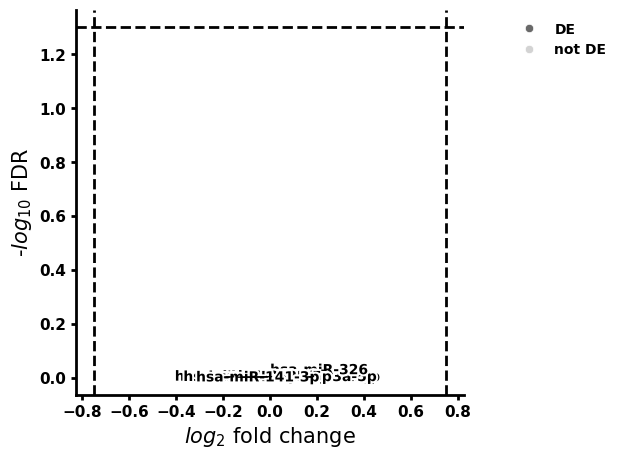

In [98]:
volcano(res, symbol='symbols')

In [102]:
new_gene_data

ID_ref,hsa-miR-652-3p,hsa-miR-181a-5p,hsa-miR-221-3p,hsa-let-7f-5p,hsa-miR-27b-3p,hsa-miR-374b-5p,hsa-miR-93-5p,hsa-miR-200a-3p,hsa-miR-484,hsa-miR-106a-5p,...,hsa-miR-182-5p,hsa-miR-15b-5p,hsa-miR-106b-3p,hsa-miR-29c-3p,hsa-miR-95,hsa-miR-21-5p,hsa-miR-30e-3p,hsa-miR-543,hsa-miR-29b-2-5p,hsa-miR-495-3p
Control 1,31.12,31.44,29.16,31.77,32.04,35.45,28.87,40.18,31.22,29.20,...,40.21,31.84,35.09,32.81,36.70,28.87,34.93,36.12,36.69,35.86
Control 2,33.60,33.56,31.15,34.01,32.63,39.99,29.07,42.00,32.27,30.23,...,37.13,32.17,42.00,33.56,36.39,28.76,38.66,37.86,35.41,38.33
Control 3,32.01,33.41,30.99,33.74,31.94,35.07,29.80,40.06,32.33,29.86,...,38.18,31.97,39.93,31.87,37.38,27.85,36.99,35.94,39.93,37.02
Control 4,32.08,32.59,30.52,33.24,31.63,35.55,28.79,40.06,31.41,29.61,...,36.73,32.23,40.43,31.38,36.78,27.92,37.14,40.43,36.49,37.11
Control 5,30.39,30.21,27.25,30.43,30.49,32.59,27.90,39.68,30.39,27.65,...,37.50,31.12,35.61,31.60,36.80,27.41,34.59,33.57,34.62,32.75
Control 6,31.50,31.85,29.38,32.67,31.87,35.15,29.66,34.53,31.64,29.51,...,42.00,32.70,36.69,32.06,42.00,27.97,37.75,35.10,35.60,35.72
Control 7,31.36,31.67,29.62,32.29,31.29,35.05,29.24,42.00,31.60,29.67,...,36.82,31.45,40.48,31.17,36.27,27.55,35.10,37.02,37.12,36.36
Control 8,31.20,31.92,29.36,33.72,32.34,35.97,28.07,42.00,31.34,28.75,...,42.00,32.02,37.64,32.07,40.30,28.39,38.02,36.37,36.44,35.37
Control 9,32.74,32.82,30.82,33.73,32.03,35.57,29.66,39.85,32.64,30.05,...,42.00,40.17,42.00,33.23,42.00,28.96,36.19,36.88,36.20,36.23
Control 10,31.06,32.53,29.52,33.29,30.93,34.71,27.66,36.63,31.46,27.83,...,39.53,31.89,36.62,33.02,36.72,28.38,36.03,40.10,42.00,36.85


In [105]:
metadata

,Type
Sample,
Control 1,Control
Control 2,Control
Control 3,Control
Control 4,Control
Control 5,Control
Control 6,Control
Control 7,Control
Control 8,Control
Control 9,Control


In [107]:
one_hot = pd.get_dummies(metadata)

In [110]:
X = new_gene_data
y = one_hot['Type_DLBCL']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)
sel_.get_support()


c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.431e-03, tolerance: 5.739e-04
  model = cd_fast.enet_coordinate_descent(


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,

In [112]:
selected = np.array(new_gene_data.columns[sel_.get_support()])

array(['hsa-miR-652-3p', 'hsa-miR-342-3p', 'hsa-miR-375', 'hsa-let-7b-3p',
       'hsa-miR-33a-5p', 'hsa-miR-99b-5p', 'hsa-miR-424-5p',
       'hsa-miR-191-5p', 'hsa-miR-423-5p', 'hsa-miR-10b-5p',
       'hsa-miR-29a-3p', 'hsa-miR-155-5p', 'hsa-miR-10a-5p',
       'hsa-miR-27a-3p', 'hsa-miR-20b-5p', 'hsa-miR-532-3p',
       'hsa-miR-132-3p', 'hsa-miR-29b-3p', 'hsa-let-7i-3p',
       'hsa-miR-205-5p', 'hsa-miR-500a-5p', 'hsa-miR-193b-3p',
       'hsa-miR-885-5p', 'hsa-miR-127-3p', 'hsa-miR-16-2-3p',
       'hsa-miR-20a-3p', 'hsa-miR-629-5p', 'hsa-miR-200c-3p',
       'hsa-miR-363-3p', 'hsa-miR-190a', 'hsa-miR-29a-5p',
       'hsa-miR-106b-3p', 'hsa-miR-95'], dtype=object)

In [139]:
vamsi = pd.read_csv('GSE264383_raw.counts.csv')

In [144]:
vamsi.drop('geneID', axis=1).set_index('geneName').rename_axis('sample').T

sample,0610005C13Rik,0610006L08Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610010F05Rik,0610010K14Rik,0610012D04Rik,0610012G03Rik,0610025J13Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
X1..1,1,0,9,1,2,67,21,4,24,0,...,188,629,0,171,225,0,557,13227,797,340
X1..2,4,0,24,10,2,108,27,11,21,0,...,181,741,0,248,230,0,580,14945,845,341
X1..3,0,0,13,5,0,62,23,4,11,0,...,156,444,0,182,210,0,478,12990,811,369
X2..1,5,0,12,4,3,54,27,6,12,0,...,157,507,0,183,158,1,527,11536,898,296
X2..2,6,0,13,0,4,127,20,0,15,0,...,147,748,0,252,195,4,576,14479,942,308
X2..3,3,0,13,4,1,73,45,6,20,0,...,199,636,0,229,182,0,776,17083,1162,364
X3..1,6,0,17,3,1,55,21,1,5,0,...,194,891,0,123,132,0,394,12876,451,222
X3..2,3,0,11,7,0,163,39,3,16,0,...,231,848,0,154,129,0,454,13942,726,362
X3..3,3,1,7,0,2,92,40,6,4,0,...,208,719,0,222,201,0,474,13411,608,233
X4..1,2,0,13,8,3,89,66,2,29,0,...,178,630,33,149,202,0,593,17706,1503,327


In [154]:
cervical_cancer_data = pd.read_table('cervical_cancer_series_matrix.txt')

In [155]:
cervical_cancer_data

,ID_REF,GSM246087,GSM246088,GSM246089,GSM246090,GSM246119,GSM246120,GSM246121,GSM246122,GSM246123,...,GSM247877,GSM247878,GSM247879,GSM247881,GSM247882,GSM247883,GSM247884,GSM247885,GSM247886,GSM247887
0,1007_s_at,1353.7,1678.6,244.3,1547.2,678.6,610.0,2201.2,1581.6,574.2,...,924.3,798.9,1425.4,1258.6,470.0,1064.3,1085.0,281.8,433.8,599.7
1,1053_at,135.8,207.1,172.7,187.3,321.3,279.5,242.5,352.0,211.8,...,79.3,147.9,150.0,193.9,42.6,125.1,53.3,23.9,13.6,42.2
2,117_at,3.3,4.6,56.6,52.4,23.9,27.9,25.6,47.1,4.6,...,65.9,96.8,77.6,121.9,61.3,112.7,46.6,53.4,42.2,31.5
3,121_at,393.2,1179.3,800.9,431.1,455.8,325.3,463.4,444.3,373.8,...,1455.2,395.4,625.3,418.5,546.9,681.4,226.0,360.4,140.2,354.3
4,1255_g_at,13.6,9.4,43.2,2.1,9.0,1.4,8.6,15.1,11.9,...,32.8,37.6,48.0,15.7,3.6,27.0,18.3,11.0,5.1,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,2.4,5.8,19.1,1.6,2.4,8.1,1.3,3.7,4.9,...,6.2,9.0,5.8,5.0,2.4,4.5,7.6,1.8,1.2,4.8
22279,AFFX-ThrX-M_at,5.6,3.5,16.9,9.1,2.0,3.7,5.8,2.8,6.0,...,5.6,8.3,3.4,11.5,8.7,31.7,2.5,8.4,0.8,2.7
22280,AFFX-TrpnX-3_at,1.0,0.4,3.6,0.7,4.2,0.2,6.2,2.0,2.8,...,5.7,1.3,3.1,1.1,0.4,1.2,5.5,0.4,1.0,0.5
22281,AFFX-TrpnX-5_at,9.2,0.5,8.2,8.9,5.0,5.1,1.3,1.2,10.6,...,12.5,12.7,3.2,2.3,1.9,3.4,2.4,2.1,1.5,6.4


In [193]:
mod_df = cervical_cancer_data.set_index('ID_REF').T

In [375]:
mod_df['Type'] = np.repeat(['0', '1', '2', '3', '4'], [9, 3, 9, 12, 33])

In [195]:
mod_df

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,Type
GSM246087,1353.7,135.8,3.3,393.2,13.6,227.1,19.1,17.1,126.2,7.9,...,32.7,9889.6,9505.8,14.3,2.4,5.6,1.0,9.2,1.8,0
GSM246088,1678.6,207.1,4.6,1179.3,9.4,56.3,32.6,41.9,6.5,4.3,...,35.0,11975.2,11167.0,4.1,5.8,3.5,0.4,0.5,0.3,0
GSM246089,244.3,172.7,56.6,800.9,43.2,165.1,67.8,11.3,2.2,16.5,...,76.4,18427.0,23819.7,6.0,19.1,16.9,3.6,8.2,1.4,0
GSM246090,1547.2,187.3,52.4,431.1,2.1,42.6,29.6,31.6,4.0,10.4,...,48.7,9896.4,8944.7,3.5,1.6,9.1,0.7,8.9,1.3,0
GSM246119,678.6,321.3,23.9,455.8,9.0,192.5,49.0,13.3,2.5,13.9,...,49.6,12427.7,12147.7,2.0,2.4,2.0,4.2,5.0,0.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM247883,1064.3,125.1,112.7,681.4,27.0,232.3,54.7,11.2,106.0,40.5,...,78.9,19702.1,17089.8,6.2,4.5,31.7,1.2,3.4,4.2,4
GSM247884,1085.0,53.3,46.6,226.0,18.3,118.8,16.0,28.3,21.9,10.9,...,22.2,6916.4,7246.9,1.9,7.6,2.5,5.5,2.4,1.5,4
GSM247885,281.8,23.9,53.4,360.4,11.0,127.9,19.6,4.4,104.2,33.7,...,29.1,4842.7,5234.8,2.6,1.8,8.4,0.4,2.1,1.4,4
GSM247886,433.8,13.6,42.2,140.2,5.1,112.6,15.1,3.2,34.7,9.5,...,23.0,8353.9,9358.8,1.2,1.2,0.8,1.0,1.5,1.5,4


In [374]:
mod_df

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM246087,1353.7,135.8,3.3,393.2,13.6,227.1,19.1,17.1,126.2,7.9,...,15.4,32.7,9889.6,9505.8,14.3,2.4,5.6,1.0,9.2,1.8
GSM246088,1678.6,207.1,4.6,1179.3,9.4,56.3,32.6,41.9,6.5,4.3,...,13.2,35.0,11975.2,11167.0,4.1,5.8,3.5,0.4,0.5,0.3
GSM246089,244.3,172.7,56.6,800.9,43.2,165.1,67.8,11.3,2.2,16.5,...,95.1,76.4,18427.0,23819.7,6.0,19.1,16.9,3.6,8.2,1.4
GSM246090,1547.2,187.3,52.4,431.1,2.1,42.6,29.6,31.6,4.0,10.4,...,3.4,48.7,9896.4,8944.7,3.5,1.6,9.1,0.7,8.9,1.3
GSM246119,678.6,321.3,23.9,455.8,9.0,192.5,49.0,13.3,2.5,13.9,...,2.4,49.6,12427.7,12147.7,2.0,2.4,2.0,4.2,5.0,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM247883,1064.3,125.1,112.7,681.4,27.0,232.3,54.7,11.2,106.0,40.5,...,29.4,78.9,19702.1,17089.8,6.2,4.5,31.7,1.2,3.4,4.2
GSM247884,1085.0,53.3,46.6,226.0,18.3,118.8,16.0,28.3,21.9,10.9,...,3.9,22.2,6916.4,7246.9,1.9,7.6,2.5,5.5,2.4,1.5
GSM247885,281.8,23.9,53.4,360.4,11.0,127.9,19.6,4.4,104.2,33.7,...,21.7,29.1,4842.7,5234.8,2.6,1.8,8.4,0.4,2.1,1.4
GSM247886,433.8,13.6,42.2,140.2,5.1,112.6,15.1,3.2,34.7,9.5,...,1.8,23.0,8353.9,9358.8,1.2,1.2,0.8,1.0,1.5,1.5


In [394]:
selected_genes = res[(res['log2FoldChange'] > 1) & (res['pvalue'] < 0.05)].index

In [395]:
mod_df.drop('Type', axis=1)[selected_genes]

ID_REF,1320_at,1438_at,1773_at,177_at,200606_at,200641_s_at,200664_s_at,200666_s_at,200703_at,200769_s_at,...,55692_at,57163_at,57588_at,59644_at,60084_at,91826_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-thr-M_s_at
GSM246087,17.1,67.1,74.6,57.9,2285.9,2781.1,886.0,1228.3,3580.8,496.8,...,72.8,687.8,1.9,15.8,3.3,202.5,0.6,1.4,13.6,18.6
GSM246088,41.9,23.9,130.3,77.0,1844.1,4959.7,860.9,1432.3,3849.3,398.9,...,238.2,723.9,4.9,16.0,6.5,280.6,0.2,2.9,9.6,11.2
GSM246089,11.3,79.6,65.9,61.7,97.7,2240.8,235.4,812.9,2199.5,70.7,...,44.3,212.1,12.5,0.7,2.1,13.1,1.8,2.2,25.1,41.4
GSM246090,31.6,49.2,93.7,105.0,3943.1,2973.2,395.6,669.4,3072.9,780.2,...,123.1,264.7,73.8,14.8,6.4,263.3,1.0,0.7,2.7,20.0
GSM246119,13.3,23.6,69.4,25.7,568.1,1333.8,538.9,690.7,3771.5,488.3,...,163.0,362.0,1.3,22.5,8.2,9.9,1.6,0.9,15.3,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM247883,11.2,323.7,79.8,127.5,4680.2,3199.5,859.5,1368.5,3350.8,411.6,...,131.3,642.8,54.0,38.5,38.0,307.2,1.8,16.2,54.6,19.6
GSM247884,28.3,141.3,45.2,54.8,2434.7,1027.4,310.7,677.2,1844.9,174.0,...,34.2,160.7,34.2,6.7,4.1,219.0,0.9,6.8,3.1,7.1
GSM247885,4.4,86.0,40.4,30.4,504.5,1011.9,965.4,896.0,808.3,88.3,...,58.1,155.4,8.5,11.9,8.0,110.6,0.9,2.6,1.9,10.4
GSM247886,3.2,17.1,11.5,20.5,944.4,77.7,84.0,269.8,1030.9,29.4,...,34.1,131.4,16.5,9.0,4.0,230.1,1.2,0.5,10.4,14.0


In [397]:
X = mod_df.drop('Type', axis=1)[selected_genes]
y = mod_df['Type']

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
# scaler.fit(X_train)
# sel_ = SelectFromModel(Lasso(alpha=0, random_state=10))
# sel_.fit(scaler.transform(X_train), y_train)
# sel_.get_support()

In [399]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [380]:
from tensorflow.keras.models import Sequential

In [381]:
from tensorflow.keras.layers import Dense

In [400]:
model = Sequential()

In [401]:
X_train_scaled.shape[1]

1606

In [419]:
model.add(Dense(27, input_dim=X_train_scaled.shape[1], activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(32, activation='elu'))

model.add(Dense(5, activation='linear'))

C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [420]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [424]:
y_train = y_train.astype(float)
model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - loss: 0.7555 - val_loss: 1.4551
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step - loss: 0.7237 - val_loss: 1.3673
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - loss: 0.6934 - val_loss: 1.2860
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.6635 - val_loss: 1.2131
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.6346 - val_loss: 1.1454
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.6091 - val_loss: 1.0829
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.5834 - val_loss: 1.0255
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.5604 - val_loss: 0.9695
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.5364 - val_loss: 0.9152
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.5138 - val_loss: 0.8634
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.4916 - val_loss: 0.8143
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.4708 - val_lo

In [425]:
llosses = pd.DataFrame(model.history.history)

<Axes: >

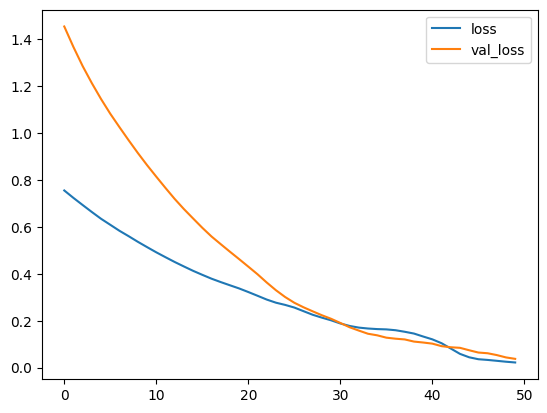

In [426]:
llosses.plot()

In [278]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [279]:
coefficients = lasso.coef_

In [284]:
selected_genes = np.where(coefficients < 0)[0]

In [285]:
res.iloc[selected_genes, :]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id
ID_REF,,,,,,,
200621_at,1153.106583,-0.205989,0.189734,-1.085672,0.277624,0.410348,200621_at
200805_at,374.985394,0.031150,0.175213,0.177784,0.858893,0.908571,200805_at
201226_at,1309.196774,0.334866,0.180736,1.852791,0.063912,0.135000,201226_at
201284_s_at,195.995289,0.123276,0.218992,0.562924,0.573486,0.691399,201284_s_at
201533_at,918.301015,-0.623126,0.221785,-2.809597,0.004960,0.017407,201533_at
201662_s_at,466.743805,0.434794,0.239870,1.812620,0.069890,0.144557,201662_s_at
201814_at,346.349827,0.098615,0.163834,0.601923,0.547226,0.669817,201814_at
201817_at,354.459982,-0.283938,0.166208,-1.708324,0.087576,0.171957,201817_at
202867_s_at,208.619557,0.259897,0.171215,1.517953,0.129026,0.231795,202867_s_at


In [265]:
selected_genes = mod_df.columns[sel_.get_support()]

In [269]:
downregulated_genes = res.loc[selected_genes][(res['log2FoldChange'] < -0.5) & (res['pvalue'] < 0.05)].sort_values('log2FoldChange', ascending=True)
downregulated_genes

C:\Users\Debma\AppData\Local\Temp\ipykernel_1816\831252209.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  downregulated_genes = res.loc[selected_genes][(res['log2FoldChange'] < -0.5) & (res['pvalue'] < 0.05)].sort_values('log2FoldChange', ascending=True)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id
ID_REF,,,,,,,
202859_x_at,1711.899272,-5.168726,0.618382,-8.358463,6.354090e-17,9.637085e-15,202859_x_at
204439_at,283.612791,-5.052271,0.648320,-7.792865,6.550656e-15,6.616396e-13,204439_at
204416_x_at,245.657604,-4.823447,0.413919,-11.653116,2.212187e-31,3.790668e-28,204416_x_at
203953_s_at,35.086118,-4.074584,0.786692,-5.179388,2.226152e-07,3.328669e-06,203953_s_at
201755_at,214.796800,-3.900997,0.327846,-11.898883,1.199421e-32,2.671830e-29,201755_at
...,...,...,...,...,...,...,...
202928_s_at,73.158044,-0.503670,0.243018,-2.072562,3.821303e-02,9.027920e-02,202928_s_at
200079_s_at,1719.358503,-0.503234,0.159283,-3.159381,1.581048e-03,6.800431e-03,200079_s_at
203285_s_at,58.703414,-0.502418,0.215552,-2.330845,1.976155e-02,5.338445e-02,203285_s_at


In [268]:
upregulated_genes = res.loc[selected_genes][(res['log2FoldChange'] > 0.5) & (res['pvalue']<0.05)].sort_values('log2FoldChange', ascending=False)
upregulated_genes

C:\Users\Debma\AppData\Local\Temp\ipykernel_1816\858730783.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  upregulated_genes = res.loc[selected_genes][(res['log2FoldChange'] > 0.5) & (res['pvalue']<0.05)].sort_values('log2FoldChange', ascending=False)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id
ID_REF,,,,,,,
204284_at,1224.572747,4.610373,0.480649,9.591970,8.641910e-22,3.319090e-19,204284_at
201044_x_at,233.267776,3.761393,0.601034,6.258199,3.894485e-10,1.206586e-08,201044_x_at
201348_at,1831.979705,3.524490,0.400717,8.795456,1.424686e-18,3.238399e-16,201348_at
204058_at,147.378661,3.227961,0.397291,8.124919,4.476628e-16,5.698364e-14,204058_at
202768_at,1454.992510,3.201921,0.706344,4.533088,5.812747e-06,5.809096e-05,202768_at
...,...,...,...,...,...,...,...
203383_s_at,246.882170,0.506373,0.158632,3.192133,1.412263e-03,6.191611e-03,203383_s_at
201408_at,361.446905,0.504898,0.218670,2.308954,2.094614e-02,5.587309e-02,201408_at
201838_s_at,82.817227,0.504760,0.187495,2.692118,7.099992e-03,2.332641e-02,201838_s_at


In [242]:
mod_df = cervical_cancer_data.set_index('ID_REF').T
metadata = pd.DataFrame(zip(mod_df.index, np.repeat(['CC-cell-line', 'NC-Commercial', 'NC-epithelium', 'NC', 'CC'], [9, 3, 9, 12, 33])), columns=['Sample', 'Type'])
metadata.set_index('Sample', inplace=True)
diff_data = mod_df
diff_data = diff_data.astype('int64')
dds = DeseqDataSet(counts=diff_data, metadata=metadata, design_factors='Type')
dds.deseq2()
stat_res = DeseqStats(dds, contrast=('Type', 'NC', 'CC'))
stat_res.summary()
res = stat_res.results_df

Fitting size factors...
... done in 0.18 seconds.

Fitting dispersions...
... done in 13.59 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 15.39 seconds.

Fitting LFCs...
... done in 7.10 seconds.

Replacing 298 outlier genes.

Fitting dispersions...
... done in 0.34 seconds.

Fitting MAP dispersions...
... done in 0.32 seconds.

Fitting LFCs...
... done in 0.21 seconds.

Running Wald tests...
... done in 3.23 seconds.



Log2 fold change & Wald test p-value: Type NC vs CC
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ID_REF                                                                       
1007_s_at        1370.152512       -0.076011  0.188173 -0.403943  0.686254   
1053_at           132.119144       -0.921708  0.232200 -3.969455  0.000072   
117_at             72.439554       -0.305880  0.265859 -1.150534  0.249924   
121_at            571.448553        0.121644  0.196339  0.619559  0.535548   
1255_g_at          21.005135        0.534933  0.283893  1.884272  0.059528   
...                      ...             ...       ...       ...       ...   
AFFX-ThrX-5_at      6.343011        0.307665  0.376523  0.817122  0.413859   
AFFX-ThrX-M_at      7.206515        0.481796  0.417083  1.155155  0.248027   
AFFX-TrpnX-3_at     3.170915        0.788091  0.563899  1.397575  0.162241   
AFFX-TrpnX-5_at     5.985667        0.119928  0.418627  0.286480  0.774511   
AFFX-TrpnX-M

In [241]:
res.iloc[4356, :]

baseMean            84.085637
log2FoldChange         5.1713
lfcSE                0.517683
stat                 9.989315
pvalue                    0.0
padj                      0.0
gene_id           204830_x_at
Name: 204830_x_at, dtype: object

In [244]:
res['gene_id'] = res.index.values

<h4>CC-cell-line & CC</h4>

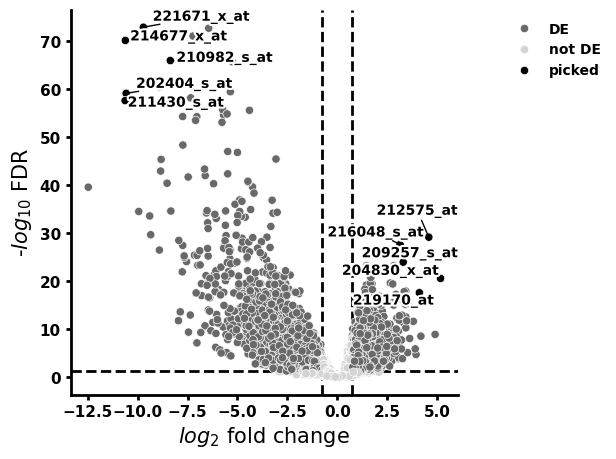

In [181]:
volcano(res, symbol='gene_id')

<h4>NC-epithelium & CC-cell-line</h4>

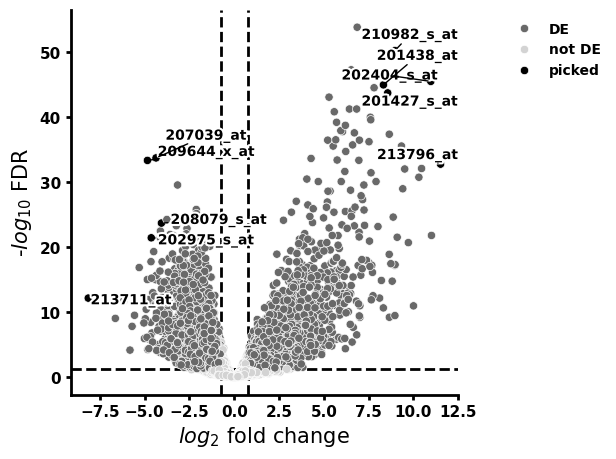

In [175]:
volcano(res, symbol='gene_id', )

<h4>NC-epithelium & CC</h4>

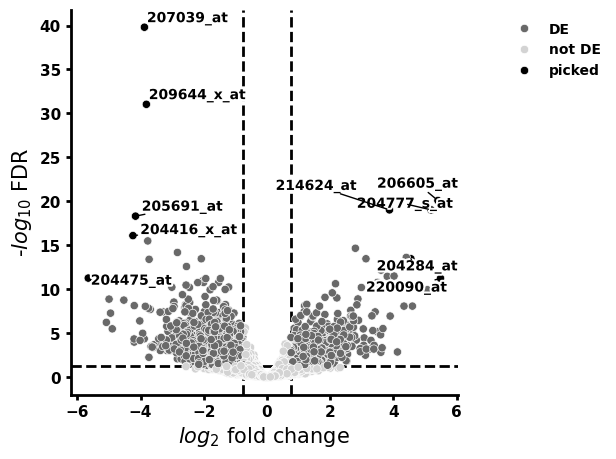

In [172]:
volcano(res, symbol='gene_id', )

<h4>NC & CC</h4>

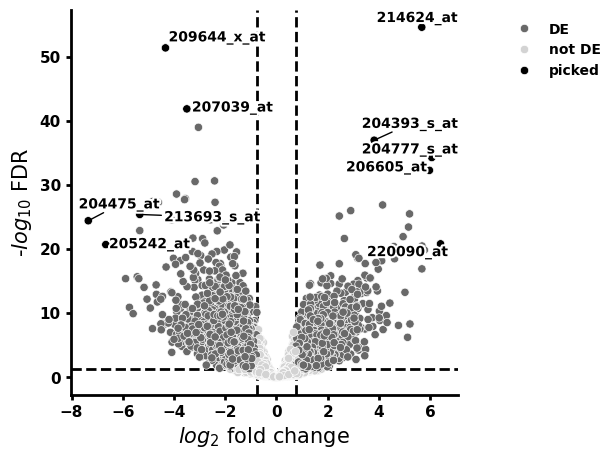

In [163]:
volcano(res, symbol='gene_id')